#### Importing libraries

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import simplejson as json
import scipy.sparse as sp
from numpy.linalg import norm
from collections import Counter, defaultdict
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split

#### Reading JSON file in 'tweets'

In [2]:
tweets = []
for line in open('tweets.json', 'r'):
    tweets.append(json.loads(line))

#### Print one line of JSON file

In [3]:
print("\nTraining Doc Sample - ",tweets[:1])


Training Doc Sample -  [{'in_reply_to_status_id_str': None, 'text': 'If mitt romney say he gunna legalize weed then obama is fucked', 'geo': None, 'in_reply_to_screen_name': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'id_str': '246058205367644160', 'retweeted': False, 'created_at': 'Thu Sep 13 01:30:22 +0000 2012', 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'entities': {'urls': [], 'user_mentions': [], 'hashtags': []}, 'in_reply_to_status_id': None, 'place': None, 'contributors': None, 'coordinates': None, 'favorited': False, 'user': {'follow_request_sent': None, 'statuses_count': 23815, 'profile_background_image_url_https': 'https://si0.twimg.com/profile_background_images/643937019/07gmvz818szy9m7tupnt.jpeg', 'default_profile_image': False, 'friends_count': 721, 'profile_sidebar_border_color': '000000', 'id_str': '237158178', 'is_translator': False, 'verified': False, 'favourites_count': 39, 'geo_enabled': 

#### Storing first 1000 tweets and data, to check if correct data gets displayed

In [4]:
import pandas as pd
tweets_df = pd.DataFrame(columns=['id','tweet'],index=None)
for tweet in tweets[0:1000]:
    data = pd.DataFrame({"id":[tweet['id_str']],"tweet":[tweet['text']]})
    tweets_df = tweets_df.append(data, ignore_index = True)

##### Printing first 10 rows of dataframe 'tweets_df'

In [5]:
tweets_df.head(20)

,id,tweet
0,246058205367644160,If mitt romney say he gunna legalize weed then...
1,246058206189727744,"@SuePalmers As a youth who has lived abroad, I..."
2,246058205464117248,"RT @illinimarine7: This ""President"" has the ga..."
3,246058206651117568,Can we please stop pretending that Obama is a ...
4,246058206814695425,RT @newtgingrich: I am glad Mitt Romney defend...
5,246058207896817664,Business Tax Accountant openings Youngstown Oh...
6,246058207460614144,RT @MotherJones: The official GOP response to ...
7,246058208584683521,@gasparurquiza usa esto viejjaaa!
8,246058208689549312,Call Center Specialist careers Vandalia Illino...
9,246058208463044608,RT @PolarCoug: Obama would never make a good r...


#### Keeping tweets with only Obama or Romney mention
Input- 'tweets' that read JSON file
Output- 'tweets_df2'- Dataframe containing tweets' id and tweets' text as 'id' and 'tweet'  
All the instances of tweets_df2['tweet'] contain either Obama or Romney mentioned in them    
'i' is printed to see the instances executed so far

In [10]:
obama_cnt = 0
romney_cnt = 0
obama_romney_cnt = 0

import pandas as pd
tweets_df1 = pd.DataFrame(columns=['id','tweet'],index=None)

for i in range(0,len(tweets)):
    if(i % 10000 == 0):
        print("i:",i)
    obama = False;
    romney = False;
    for word in tweets[i]['text'].split():
#         print(word)
        if word.lower() in ["obama","barack","barackobama","obamabarack"]:
            obama = True
        if word.lower() in["mitt","romney","mittromney","romneymitt"]:
            romney = True
    if obama == True and romney == False:
        data = pd.DataFrame({"id":[tweets[i]['id_str']],"tweet":[tweets[i]['text']]})
        tweets_df1 = tweets_df1.append(data, ignore_index = True)
        obama_cnt += 1
    elif obama == False and romney == True:
        data = pd.DataFrame({"id":[tweets[i]['id_str']],"tweet":[tweets[i]['text']]})
        tweets_df1 = tweets_df1.append(data, ignore_index = True)
        romney_cnt += 1
#     elif obama == True and romney == True:
#         obama_romney_cnt += 1
print(obama_cnt)
print(romney_cnt)
#print(obama_romney_cnt)

i: 0
i: 10000
i: 20000
i: 30000
i: 40000
i: 50000
i: 60000
i: 70000
i: 80000
i: 90000
i: 100000
i: 110000
i: 120000
i: 130000
i: 140000
i: 150000
i: 160000
i: 170000
i: 180000
i: 190000
i: 200000
i: 210000
i: 220000
i: 230000
i: 240000
i: 250000
i: 260000
i: 270000
i: 280000
i: 290000
i: 300000
i: 310000
i: 320000
i: 330000
i: 340000
i: 350000
i: 360000
i: 370000
i: 380000
i: 390000
i: 400000
i: 410000
i: 420000
i: 430000
i: 440000
i: 450000
i: 460000
i: 470000
i: 480000
i: 490000
i: 500000
i: 510000
i: 520000
i: 530000
i: 540000
i: 550000
i: 560000
i: 570000
i: 580000
i: 590000
i: 600000
i: 610000
i: 620000
i: 630000
i: 640000
i: 650000
i: 660000
i: 670000
i: 680000
i: 690000
i: 700000
i: 710000
i: 720000
i: 730000
i: 740000
i: 750000
i: 760000
i: 770000
i: 780000
i: 790000
i: 800000
i: 810000
i: 820000
i: 830000
i: 840000
i: 850000
i: 860000
i: 870000
i: 880000
i: 890000
i: 900000
i: 910000
i: 920000
i: 930000
i: 940000
i: 950000
i: 960000
i: 970000
i: 980000
i: 990000
324805
30092


#### Function defined to remove patterns in 'tweets_df2['tweet']'

In [37]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

#### Defining Patterns to be removed

In [91]:
tweets_df1['tweet'] = np.vectorize(remove_pattern)(tweets_df1['tweet'], "@[\w]*")

In [93]:
tweets_df1.head(10)

,id,tweet
0,246058206651117568,can we pleas stop pretend that obama is a good...
1,246058207460614144,RT the offici gop respons to american be kill ...
2,246058208463044608,RT obama would never make a good run back He k...
3,246058208584671234,RT you cant bag on obama if you onli pay atten...
4,246058212116267008,nation pressur on both side to end it will hav...
5,246058212946751489,egypt s islamist pre take legal action US agns...
6,246058213290688512,RT how you know mitt is win the media spend al...
7,246058214104383489,obama vow to track down ambassador s killer ti...
8,246058214276354050,obama is probabl apart of the muslim brotherho...
9,246058213500407808,RT presid obama on the valu and faith that gui...


In [94]:
tweets_df1['tweet'] = tweets_df1['tweet'].str.replace("[^a-zA-Z#]", " ")

In [43]:
len(tweets_df1)

354897

#### Separating each word from the 'tweet'

In [44]:
tokenized_tweets_df = tweets_df1['tweet'].apply(lambda x: x.split())
tokenized_tweets_df.head()

0    [Can, we, please, stop, pretending, that, Obam...
1    [RT, The, official, GOP, response, to, America...
2    [RT, Obama, would, never, make, a, good, runni...
3    [RT, You, cant, bag, on, Obama, if, you, only,...
4    [national, pressure, on, both, sides, to, end,...
Name: tweet, dtype: object

#### Stemming individual words

Stemming returns words in their basic form

In [45]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

stemmed_tweets_df = tokenized_tweets_df.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
stemmed_tweets_df.head()

0    [can, we, pleas, stop, pretend, that, obama, i...
1    [RT, the, offici, gop, respons, to, american, ...
2    [RT, obama, would, never, make, a, good, run, ...
3    [RT, you, cant, bag, on, obama, if, you, onli,...
4    [nation, pressur, on, both, side, to, end, it,...
Name: tweet, dtype: object

#### Combining stemmed words as a sentence for each tweet

In [46]:
for i in range(len(stemmed_tweets_df)):
    stemmed_tweets_df[i] = ' '.join(stemmed_tweets_df[i])

tweets_df1['tweet'] = stemmed_tweets_df

In [23]:
tweets_df1.head()

,id,tweet
0,246058205367644160,If mitt romney say he gunna legal weed then ob...
1,246058206189727744,As a youth who ha live abroad I share the pres...
2,246058205464117248,RT thi presid ha the gall to apolog for our wa...
3,246058206651117568,can we pleas stop pretend that obama is a good...
4,246058206814695425,RT I am glad mitt romney defend america and fr...


#### Converting polarity scores to -1, 0 or 1
if polarity score is negative, sentiment is assigned to -1  
if polarity score is positive, sentiment is assigned to +1  
if polarity score is neutral, sentiment is assigned to 0  


In [47]:
def sentiment_conversion(sentiment_of_tweet):
    if float(sentiment_of_tweet) > 0.0:
        return 1
    elif float(sentiment_of_tweet) < 0.0:
        return -1
    else:
        return 0

Install textblob, only needed for the first time

In [48]:
#! pip install textblob

importing textblob

In [49]:
from textblob import TextBlob as tb

#### Getting polarity scores of each tweet, storing it in the form of array 'pol'
Polarity Scores are converted to -1,0,1 by caaling 'get_sentiment' function
Assign new sentiment score to 'sentiment_conv'
'tweets_df2' dataframe contains 'tweet' and 'sentiment'

In [50]:
pol = []
tweets_df2 = pd.DataFrame(columns=['tweet', 'sentiment'],index=None)

for twee in tweets_df1['tweet']:
    testimonial = tb(twee)
    sentiment_of_tweet = testimonial.sentiment.polarity
    pol.append(sentiment_of_tweet)
    sentiment_conv = sentiment_conversion(sentiment_of_tweet)
    data = pd.DataFrame({"tweet":[twee[0:]], "sentiment":[sentiment_conv]})
    tweets_df2 = tweets_df2.append(data, ignore_index = True)
    

In [51]:
tweets_df2.head(10)

,tweet,sentiment
0,can we pleas stop pretend that obama is a good...,1
1,RT the offici gop respons to american be kill ...,0
2,RT obama would never make a good run back He k...,1
3,RT you cant bag on obama if you onli pay atten...,0
4,nation pressur on both side to end it will hav...,0
5,egypt s islamist pre take legal action US agns...,1
6,RT how you know mitt is win the media spend al...,1
7,obama vow to track down ambassador s killer ti...,-1
8,obama is probabl apart of the muslim brotherho...,0
9,RT presid obama on the valu and faith that gui...,-1


In [52]:
pol

[0.6999999999999998,
 0.0,
 0.35,
 0.0,
 0.0,
 0.15000000000000002,
 0.8,
 -0.05824915824915827,
 0.0,
 -0.5,
 0.0,
 -0.05824915824915827,
 0.2,
 -0.05824915824915827,
 0.0,
 -0.05824915824915827,
 0.0,
 -0.05824915824915827,
 0.0,
 0.5,
 -0.05824915824915827,
 -5.551115123125783e-17,
 -0.125,
 -0.05824915824915827,
 0.21666666666666667,
 0.0,
 -0.05824915824915827,
 0.125,
 -0.2,
 -0.05824915824915827,
 0.0,
 0.2,
 0.0,
 -0.05824915824915827,
 0.0,
 0.5,
 -0.05824915824915827,
 -0.05824915824915827,
 -5.551115123125783e-17,
 -0.05824915824915827,
 -0.08333333333333333,
 0.0,
 0.0,
 -0.05824915824915827,
 -0.05824915824915827,
 0.0,
 -0.05824915824915827,
 0.0,
 -0.8,
 0.0,
 0.13636363636363635,
 0.0,
 -0.6000000000000001,
 0.0,
 0.35714285714285715,
 0.0,
 -0.5,
 -0.012499999999999997,
 -0.30000000000000004,
 0.0,
 0.0,
 -0.15555555555555559,
 0.0,
 -0.08181818181818182,
 0.0,
 0.8,
 0.0,
 0.0,
 0.2,
 0.13636363636363635,
 0.8,
 0.13636363636363635,
 0.04375000000000001,
 0.0,
 0.0,
 

#### Calculating overall sentiments of tweets as Positive, Neutral and Negative

In [53]:
pos = []
neg = []
neu = []
pol_ap = []


for p in pol:
    if float(p) > 0.0:
        pos.append(p)
        pol_ap.append(1)
        
    if float(p) < 0.0:
        neg.append(p)
        pol_ap.append(-1)

        
    if p not in pos:
        if p not in neg:
            neu.append(p)
            pol_ap.append(0)
            
            
print(len(pos))
print(len(neg))
print(len(neu))

102808
66518
185571


#### Plotting Pie Chart to depict overall sentiments of tweets as Positive, Negative and Neutral

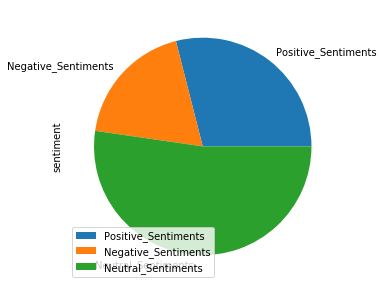

In [75]:
plot_df = pd.DataFrame({'sentiment': [len(pos), len(neg), len(neu)]}, index=['Positive_Sentiments', 'Negative_Sentiments', 'Neutral_Sentiments'])
plot = plot_df.plot.pie(y='sentiment', figsize=(5, 5))

In [80]:
#plot = plot_df.plot.bar(y='sentiment', figsize=(5, 5))

In [54]:
len(pol_ap)

354897

In [55]:
tweets_df2.head(10)

,tweet,sentiment
0,can we pleas stop pretend that obama is a good...,1
1,RT the offici gop respons to american be kill ...,0
2,RT obama would never make a good run back He k...,1
3,RT you cant bag on obama if you onli pay atten...,0
4,nation pressur on both side to end it will hav...,0
5,egypt s islamist pre take legal action US agns...,1
6,RT how you know mitt is win the media spend al...,1
7,obama vow to track down ambassador s killer ti...,-1
8,obama is probabl apart of the muslim brotherho...,0
9,RT presid obama on the valu and faith that gui...,-1


In [56]:
len(tweets_df2)

354897

#### Getting Positive, Negative and Neutral Sentiments towards Obama and Romney

In [57]:
obama_sentiment_positive = 0
obama_sentiment_negative = 0
obama_sentiment_neutral = 0
romney_sentiment_positive = 0
romney_sentiment_negative = 0
romney_sentiment_neutral = 0

i = 0
#tweets_df2[0]['tweet']
for twee in tweets_df2['tweet']:
    
    for word in twee.split():
        #print(word)
        if word.lower() in ["obama","barack","barackobama","obamabarack"]:
            if pol_ap[i] == -1:
                obama_sentiment_negative += 1
            elif pol_ap[i] == 1:
                obama_sentiment_positive += 1
            else:
                obama_sentiment_neutral += 1
            i += 1
            break
        if word.lower() in["mitt","romney","mittromney","romneymitt"]:
            if pol_ap[i] == -1:
                romney_sentiment_negative += 1
            elif pol_ap[i] == 1:
                romney_sentiment_positive += 1
            else:
                romney_sentiment_neutral += 1            
            i += 1
            break
print(obama_sentiment_positive)
print(obama_sentiment_negative)
print(obama_sentiment_neutral)
print(romney_sentiment_positive)
print(romney_sentiment_negative)
print(romney_sentiment_neutral)
        

91884
61593
172337
10924
4925
13234


#### Printing Result-

In [59]:
print("obama_sentiment_positive",obama_sentiment_positive)
print("obama_sentiment_negative",obama_sentiment_negative)
print("obama_sentiment_neutral",obama_sentiment_neutral)
print("romney_sentiment_positive",romney_sentiment_positive)
print("romney_sentiment_negative",romney_sentiment_negative)
print("romney_sentiment_neutral",romney_sentiment_neutral)

obama_sentiment_positive 91884
obama_sentiment_negative 61593
obama_sentiment_neutral 172337
romney_sentiment_positive 10924
romney_sentiment_negative 4925
romney_sentiment_neutral 13234


#### Plotting Sentiments of tweets towards Obama and Romney 

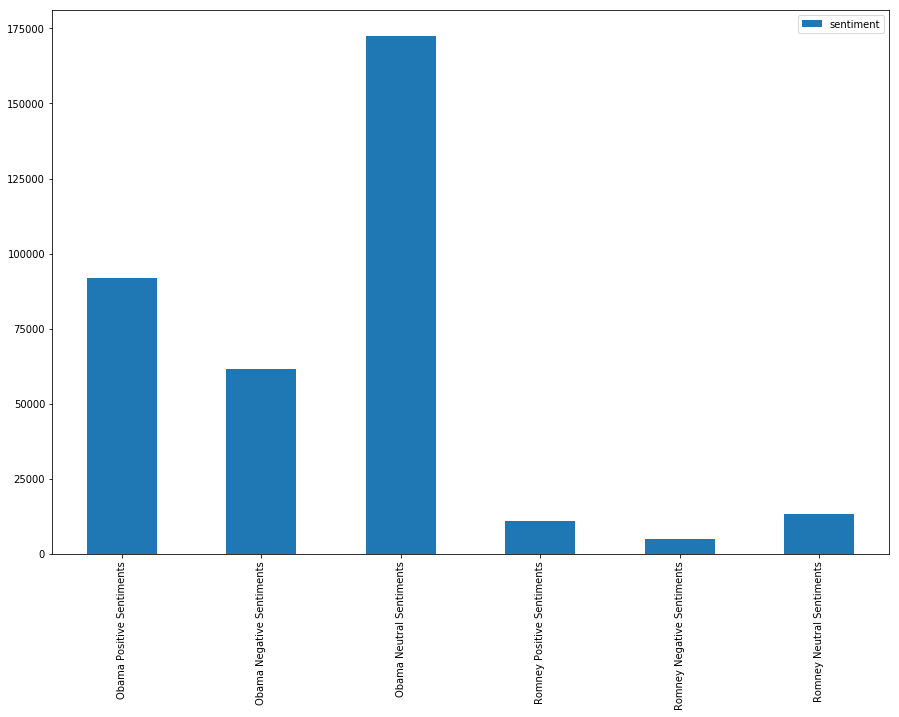

In [79]:
plot_df = pd.DataFrame({'sentiment': [obama_sentiment_positive, obama_sentiment_negative, obama_sentiment_neutral,romney_sentiment_positive,romney_sentiment_negative,romney_sentiment_neutral]}, index=['Obama Positive Sentiments', 'Obama Negative Sentiments', 'Obama Neutral Sentiments','Romney Positive Sentiments', 'Romney Negative Sentiments', 'Romney Neutral Sentiments'])
plot = plot_df.plot.bar(y='sentiment', figsize=(15, 10))

#### Calculating number of mentions for each Obama and Romney

In [58]:
obama_mention = 0
romney_mention = 0
obama_mention = obama_sentiment_positive + obama_sentiment_negative + obama_sentiment_neutral
romney_mention = romney_sentiment_positive + romney_sentiment_negative + romney_sentiment_neutral

print(romney_mention)              
print(obama_mention)

29083
325814


#### Calculating total number of tweets favoring Obama and for Romney, percentage of votes calculation

Assumption: Negative # of sentiments for Obama are considered as Positive # of sentiments for Romney

In [60]:
votes_for_obama = 0
votes_for_romney = 0
Total_votes = 0
percentage_votes_obama = 0.0
percentage_votes_romney = 0.0
votes_for_obama = obama_sentiment_positive + romney_sentiment_negative
votes_for_romney = obama_sentiment_negative + romney_sentiment_negative
Total_votes = votes_for_obama + votes_for_romney
percentage_votes_obama = (votes_for_obama*100)/Total_votes
percentage_votes_romney = (votes_for_romney*100)/Total_votes


#### Printing Result

In [61]:
print("Percentage Votes for Obama:", percentage_votes_obama)
print("Percentage Votes for Romney:", percentage_votes_romney)

Percentage Votes for Obama 59.273114671793394
Percentage Votes for Romney 40.726885328206606


#### Plotting Predicted Popular Vote Percentage

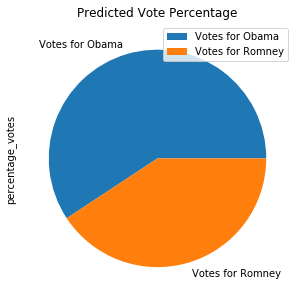

In [86]:
plot_df = pd.DataFrame({'percentage_votes': [percentage_votes_obama, percentage_votes_romney]}, index=['Votes for Obama', 'Votes for Romney'])
plot = plot_df.plot.pie(y='percentage_votes', figsize=(5, 5), title = 'Predicted Vote Percentage')

#### Plotting Actual Popular Vote Percentage in 2012 USA Presidential Election

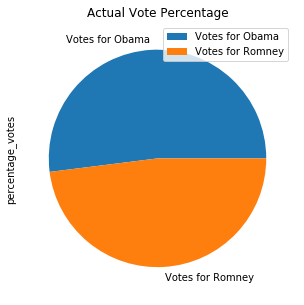

In [88]:
plot_df = pd.DataFrame({'percentage_votes': [51.1, 47.2]}, index=['Votes for Obama', 'Votes for Romney'])
plot = plot_df.plot.pie(y='percentage_votes', figsize=(5, 5), title = 'Actual Vote Percentage')

In [68]:
write_file = tweets_df2.to_csv(index=False)

In [71]:
with open('predictions.csv','w+') as file:
    file.write(write_file) 

file.close()